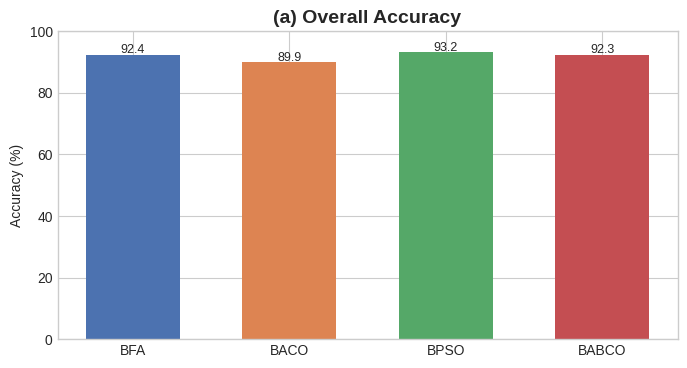

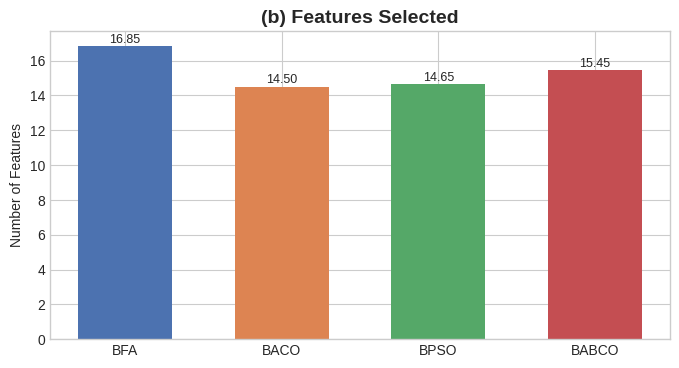

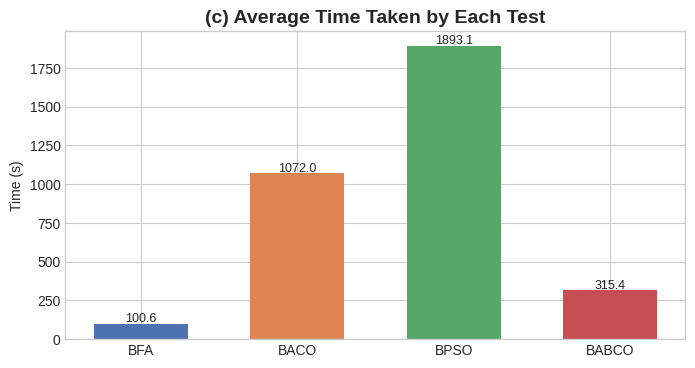

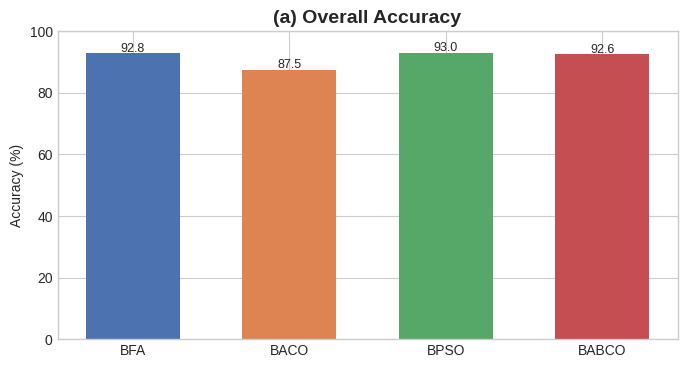

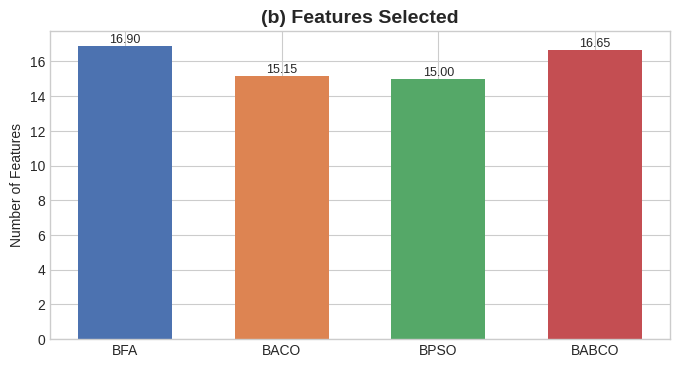

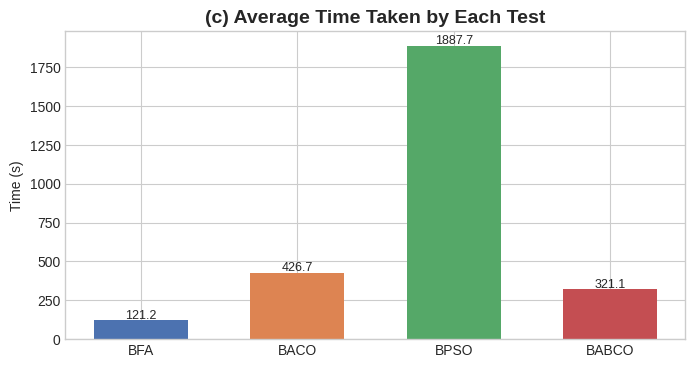

In [3]:
import matplotlib.pyplot as plt

# Datos
algorithms = ['BFA', 'BACO', 'BPSO', 'BABCO']

# ANTES
accuracy_before = [0.9238, 0.8986, 0.9315, 0.9234]
features_before = [16.85, 14.50, 14.65, 15.45]
time_before = [100.60, 1071.97, 1893.14, 315.37]

# DESPUÉS
accuracy_after = [0.9276, 0.8745, 0.9297, 0.9262]
features_after = [16.90, 15.15, 15.00, 16.65]
time_after = [121.19, 426.74, 1887.67, 321.08]

# Estilo
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52']
bar_width = 0.6

# ---------- ANTES ----------
# (a) Accuracy
plt.figure(figsize=(8,4))
plt.bar(algorithms, [a*100 for a in accuracy_before], color=colors, width=bar_width)
plt.title('(a) Overall Accuracy', fontsize=14, weight='bold')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, v in enumerate(accuracy_before):
    plt.text(i, v*100 + 0.5, f"{v*100:.1f}", ha='center', fontsize=9)
plt.show()

# (b) Features
plt.figure(figsize=(8,4))
plt.bar(algorithms, features_before, color=colors, width=bar_width)
plt.title('(b) Features Selected', fontsize=14, weight='bold')
plt.ylabel('Number of Features')
for i, v in enumerate(features_before):
    plt.text(i, v + 0.2, f"{v:.2f}", ha='center', fontsize=9)
plt.show()

# (c) Time
plt.figure(figsize=(8,4))
plt.bar(algorithms, time_before, color=colors, width=bar_width)
plt.title('(c) Average Time Taken by Each Test', fontsize=14, weight='bold')
plt.ylabel('Time (s)')
for i, v in enumerate(time_before):
    plt.text(i, v + 10, f"{v:.1f}", ha='center', fontsize=9)
plt.show()


# ---------- DESPUÉS ----------
# (a) Accuracy
plt.figure(figsize=(8,4))
plt.bar(algorithms, [a*100 for a in accuracy_after], color=colors, width=bar_width)
plt.title('(a) Overall Accuracy', fontsize=14, weight='bold')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, v in enumerate(accuracy_after):
    plt.text(i, v*100 + 0.5, f"{v*100:.1f}", ha='center', fontsize=9)
plt.show()

# (b) Features
plt.figure(figsize=(8,4))
plt.bar(algorithms, features_after, color=colors, width=bar_width)
plt.title('(b) Features Selected', fontsize=14, weight='bold')
plt.ylabel('Number of Features')
for i, v in enumerate(features_after):
    plt.text(i, v + 0.2, f"{v:.2f}", ha='center', fontsize=9)
plt.show()

# (c) Time
plt.figure(figsize=(8,4))
plt.bar(algorithms, time_after, color=colors, width=bar_width)
plt.title('(c) Average Time Taken by Each Test', fontsize=14, weight='bold')
plt.ylabel('Time (s)')
for i, v in enumerate(time_after):
    plt.text(i, v + 10, f"{v:.1f}", ha='center', fontsize=9)
plt.show()


🔹 Top 10 features más seleccionadas (ANTES):
Feature 7 → seleccionada por 4 algoritmos
Feature 29 → seleccionada por 4 algoritmos
Feature 28 → seleccionada por 4 algoritmos
Feature 22 → seleccionada por 4 algoritmos
Feature 12 → seleccionada por 3 algoritmos
Feature 1 → seleccionada por 3 algoritmos
Feature 3 → seleccionada por 3 algoritmos
Feature 9 → seleccionada por 3 algoritmos
Feature 30 → seleccionada por 3 algoritmos
Feature 6 → seleccionada por 2 algoritmos

🔹 Top 10 features más seleccionadas (DESPUÉS):
Feature 1 → seleccionada por 4 algoritmos
Feature 2 → seleccionada por 4 algoritmos
Feature 3 → seleccionada por 4 algoritmos
Feature 8 → seleccionada por 4 algoritmos
Feature 7 → seleccionada por 3 algoritmos
Feature 6 → seleccionada por 3 algoritmos
Feature 9 → seleccionada por 3 algoritmos
Feature 20 → seleccionada por 3 algoritmos
Feature 28 → seleccionada por 3 algoritmos
Feature 29 → seleccionada por 3 algoritmos


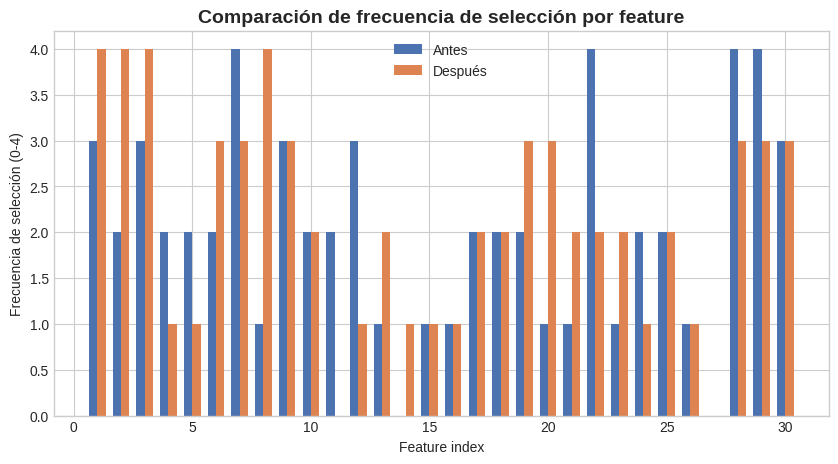

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Cadenas binarias ---

before = {
    'BFA':   '101110101111100110000101100110',
    'BACO':  '000101101010000011101100010111',
    'BPSO':  '111001101001001001010101000111',
    'BABCO': '111010110101000000100110100111'
}

after = {
    'BFA':   '111101111000100001111010100101',
    'BACO':  '111001111101000000111100010010',
    'BPSO':  '111011111000000110000101000111',
    'BABCO': '111000010100111011110010100111'
}

# --- Conversión a matrices ---
def binary_matrix(dic):
    mat = np.array([list(map(int, v)) for v in dic.values()])
    return mat

mat_before = binary_matrix(before)
mat_after = binary_matrix(after)

# --- Conteo por columna ---
sum_before = mat_before.sum(axis=0)
sum_after = mat_after.sum(axis=0)

# --- Top 10 ---
top10_before = np.argsort(-sum_before)[:10] + 1   # +1 porque las features empiezan en 1
top10_after = np.argsort(-sum_after)[:10] + 1

# --- Mostrar resultados ---
print("🔹 Top 10 features más seleccionadas (ANTES):")
for i in top10_before:
    print(f"Feature {i} → seleccionada por {sum_before[i-1]} algoritmos")

print("\n🔹 Top 10 features más seleccionadas (DESPUÉS):")
for i in top10_after:
    print(f"Feature {i} → seleccionada por {sum_after[i-1]} algoritmos")

# --- Gráfica comparativa ---
features = np.arange(1, len(sum_before)+1)
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(features - width/2, sum_before, width, label='Antes', color='#4c72b0')
plt.bar(features + width/2, sum_after, width, label='Después', color='#dd8452')
plt.title('Comparación de frecuencia de selección por feature', fontsize=14, weight='bold')
plt.xlabel('Feature index')
plt.ylabel('Frecuencia de selección (0-4)')
plt.legend()
plt.show()
